✅ Реализуйте функцию `find_best_split`, которая должна находить оптимальное разбиение подмножества обучающей выборки. 
- При решении задачи регрессии испольуйте дисперсию подвыборки
- При решении задачи классификации используйте критерий Джини

Функцию`find_best_split` можно протестируйте на датасете `Boston` из `sklearn`

In [1]:
from collections import Counter
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [2]:
boston = load_boston()
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
y = boston["target"]
X.head()

print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [3]:
def slow_find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame], 
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`
    
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    
    if task == 'regression':
        thresholds = []
        variance = []
        n_d = pd.DataFrame({'X':list(feature_vector), 'y':list(target_vector)})
        if feature_type == 'real':
            n_d.sort_values(by='X')

            #цикл по всем возможным порогам в сортированной выборке
            for i in range(1,n_d.shape[0]):
                threshold_best = (n_d['X'][i] + n_d['X'][i-1])/2
                thresholds.append(threshold_best)

                #подсчет дисперсии
                variance_best = -(len(n_d.loc[n_d['X'] > threshold_best])/n_d.shape[0]
                                  )*(n_d.loc[n_d['X'] > threshold_best]['y'].var()
                                     ) - (len(n_d.loc[n_d['X'] < threshold_best])/n_d.shape[0]
                                  )*(n_d.loc[n_d['X'] < threshold_best]['y'].var())
                variance.append(variance_best)
            
        elif feature_type == 'categorical':
            #цикл по всем возможным значениям объектам
            for item in n_d['X'].unique():
                thresholds.append(item)
                variance_best = -(len(n_d.loc[n_d['X'] == item])/n_d.shape[0]
                                  )*(n_d.loc[n_d['X'] == item]['y'].var()
                                     ) - (len(n_d.loc[n_d['X'] != item])/n_d.shape[0]
                                  )*(n_d.loc[n_d['X'] != item]['y'].var())
                variance.append(variance_best)
            
        variance_best = max(variance)
        best_index = variance.index(variance_best)
        threshold_best = thresholds[best_index]

        return(thresholds, variance, threshold_best, variance_best)
    
    
    
    elif task == 'classification':
        thresholds = []
        ginis = []
        n_d = pd.DataFrame({'X':list(feature_vector), 'y':list(target_vector)})

        if feature_type == 'real':
            n_d.sort_values(by='X')

            for i in range(1,n_d.shape[0]):
                threshold_best = (n_d['X'][i] + n_d['X'][i-1])/2
                thresholds.append(threshold_best)

                #подсчет вероятностей в обеих частях выборки
                p0_left = Counter(n_d.loc[n_d['X'] > threshold_best])[0]/len(n_d.loc[n_d['X'] > threshold_best])
                p1_left = Counter(n_d.loc[n_d['X'] > threshold_best])[1]/len(n_d.loc[n_d['X'] > threshold_best])
                p0_right = Counter(n_d.loc[n_d['X'] < threshold_best])[0]/len(n_d.loc[n_d['X'] < threshold_best])
                p1_right = Counter(n_d.loc[n_d['X'] < threshold_best])[1]/len(n_d.loc[n_d['X'] < threshold_best])

                #подчсет коэффициента Джини
                gini_best = -(len(n_d.loc[n_d['X'] > threshold_best])/n_d.shape[0]
                                  )*(1 - p0_left**2 - p1_left**2
                                     ) - (len(n_d.loc[n_d['X'] < threshold_best])/n_d.shape[0]
                                  )*(1 - p0_right**2 - p1_right**2)
                ginis.append(gini_best)


        elif feature_type == 'categorical':
            for item in n_d['X'].unique():
                thresholds.append(item)

                p0_left = Counter(n_d.loc[n_d['X'] == item])[0]/len(n_d.loc[n_d['X'] == item])
                p1_left = Counter(n_d.loc[n_d['X'] == item])[1]/len(n_d.loc[n_d['X'] == item])
                p0_right = Counter(n_d.loc[n_d['X'] != item])[0]/len(n_d.loc[n_d['X'] != item])
                p1_right = Counter(n_d.loc[n_d['X'] != item])[1]/len(n_d.loc[n_d['X'] != item])

                gini_best = -(len(n_d.loc[n_d['X'] == item])/n_d.shape[0]
                                  )*(1 - p0_left**2 - p1_left**2
                                     ) - (len(n_d.loc[n_d['X'] != item])/n_d.shape[0]
                                  )*(1 - p0_right**2 - p1_right**2)
                ginis.append(gini_best)
        
        gini_best = max(ginis)
        best_index = ginis.index(gini_best)
        threshold_best = thresholds[best_index]
        
    
        return (thresholds, ginis, threshold_best, gini_best)

In [4]:
thresholds_boston, variances_boston, threshold_best_boston, variance_best_boston = slow_find_best_split(
    X["CRIM"].to_numpy(), 
    y, 
    task="regression",
    feature_type="real"
)

In [ ]:
print("Оптимальный порог для задачи регрессии:",threshold_best_boston)
print("Значение целевой функции для оптимального порога:",variance_best_boston)

Оптимальный порог для задачи регресии: 6.669129999999999
Значение целевой функции для оптимального порога: -68.32691387792042


In [6]:
data = pd.read_csv('train_kaggle.csv', header=0)

thresholds, variances, threshold_best, variance_best = slow_find_best_split(
    data["LotShape"].to_numpy(), 
    data['SalePrice'].to_numpy(), 
    task="regression",
    feature_type="categorical"
)

In [ ]:
print("Оптимальный значение обьекта для задачи регрессии:",threshold_best)
print("Значение целевой функции для оптимального значения:",variance_best)

Оптимальный значение обьекта для задачи регресии: Reg
Значение целевой функции для оптимального значения: -5863454669.979711


In [8]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1

thresholds, ginis, threshold_best, gini_best = slow_find_best_split(
    df["age"].to_numpy(), 
    df["y"].to_numpy(), 
    task="classification",
    feature_type="real"
)

In [9]:
print("Оптимальный порог для задачи классификации:",threshold_best)
print("Значение целевой функции для оптимального порога:",gini_best)

Оптимальный порог для задачи классификации: 31.0
Значение целевой функции для оптимального порога: -0.952728950179664


In [10]:
thresholds, ginis, threshold_best, gini_best = slow_find_best_split(
    df["job"].to_numpy(), 
    df["y"].to_numpy(), 
    task="classification",
    feature_type="categorical"
)

In [11]:
print("Оптимальный значение обьекта для задачи классификации:",threshold_best)
print("Значение целевой функции для оптимального значения:",gini_best)

Оптимальный значение обьекта для задачи классификации: housemaid
Значение целевой функции для оптимального значения: -1.0


Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `CRIM`.

<function matplotlib.pyplot.show(close=None, block=None)>

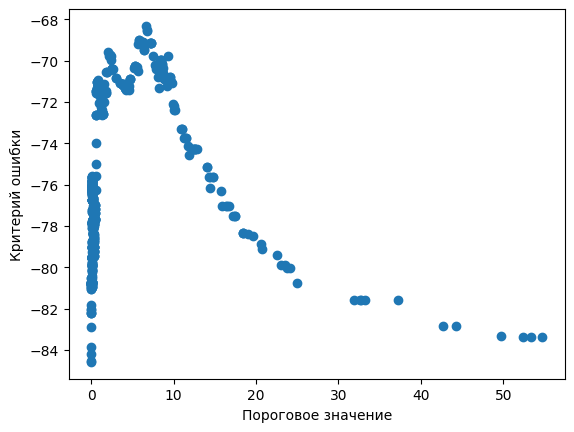

In [12]:
plt.xlabel("Пороговое значение")
plt.ylabel("Критерий ошибки")

plt.plot(thresholds_boston, variances_boston, 'o')
plt.show